# Data Dictionary

budget: the budget of a movie. Some movies don't have this, so it appears as 0

company: the production company

country: country of origin

director: the director

genre: main genre of the movie.

gross: revenue of the movie

name: name of the movie

rating: rating of the movie (R, PG, etc.)

released_date: release date (YYYY-MM-DD)

released_country: release country of the movie

runtime: duration of the movie

score: IMDb user rating

votes: number of user votes

star: main actor/actress

writer: writer of the movie

year: year of release

In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create.

In [3]:
#Read the data

df = pd.read_csv('movies.csv')

In [4]:
#Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Create a copy of the dataset

df1 = df.copy()
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# Basic Data Cleaning

Data Splitting

In [6]:
#Splitting Released Date and Released Country

i = df1['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'released_date',1:'released_country'})
i

C:\Users\Graciela Christina\AppData\Local\Temp\ipykernel_22632\1331647265.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  i = df1['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'released_date',1:'released_country'})


,released_date,released_country
0,"June 13, 1980",United States
1,"July 2, 1980",United States
2,"June 20, 1980",United States
3,"July 2, 1980",United States
4,"July 25, 1980",United States
...,...,...
7663,"October 23, 2020",United States
7664,"February 7, 2020",United States
7665,"April 27, 2020",Cameroon
7666,"October 1, 2020",United States


In [7]:
#Insert the two new columns created

df1.insert(4,'released_date',i['released_date'])

df1.insert(5,'released_country',i['released_country'])

In [8]:
#Drop the previous column

df1.drop(['released'],axis=1,inplace=True)

In [9]:
#Change released_date data type to datetime64

df1['released_date'] = df1['released_date'].astype(str).astype('datetime64')

In [10]:
#Recheck data types --> make sure released_date has the datetime64[ns] data type.

df1.dtypes

name                        object
rating                      object
genre                       object
year                         int64
released_date       datetime64[ns]
released_country            object
score                      float64
votes                      float64
director                    object
writer                      object
star                        object
country                     object
budget                     float64
gross                      float64
company                     object
runtime                    float64
dtype: object

Missing Data

In [11]:
#Check for missing data

for col in df1.columns:
    percent_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released_date - 0.0002608242044861763%
released_country - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [12]:
#Check how many missing data are there in numbers

df1.isna().sum().sort_values(ascending=False).reset_index().rename(columns={"index":"Columns",0:"Null_Values"})

,Columns,Null_Values
0,budget,2171
1,gross,189
2,rating,77
3,company,17
4,runtime,4
5,score,3
6,votes,3
7,writer,3
8,country,3
9,released_date,2


In [13]:
#Check for datatypes of the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
#Missing Data Explanations:

#The null values are in 12 columns described as below:
   # 6 of them have the object data type.
   # 5 of them have the float64 data type.
   # 1 of them is datetime64 data type.

#Planned Solution to clean the data:    
#1a. For the float64 dtype columns, the null values will be replaced with "0". 
     #Those columns are : runtime, score, and votes. 
    
#1b. For the rest of the remaining columns, np.mean method will be used to replace the null values.
     #Those columns are: budget and gross.

#2. For object dtype columns, the null values will be replaced with "Others". 
    #Those columns are : rating, company, writer, country, releaced_country, and star.

#3. For the datetime64 dtype column, the null values will be replaced with "0000-00-00".
    #The column is: released_date.

In [15]:
#1a

a = ['runtime','score','votes']
for x in a:
    df1[x].fillna(0,inplace=True) 

In [16]:
#1b

b = ['budget','gross']
for y in b:
    df1[y].fillna(round(np.mean(df1[y])),inplace=True)

In [17]:
#2

c = ['rating','company','writer','country','released_country','star']
for z in c:
    df1[z].fillna("Others",inplace=True)

In [18]:
#3

df1['released_date'].fillna('0000-00-00',inplace=True)

Recheck Missing Values

In [19]:
#Recheck Columns with Null Values

df1.isna().sum().sort_values(ascending=False).reset_index().rename(columns={"index":"Columns",0:"Null_Values"})

,Columns,Null_Values
0,name,0
1,rating,0
2,genre,0
3,year,0
4,released_date,0
5,released_country,0
6,score,0
7,votes,0
8,director,0
9,writer,0


Change Data Types Needed

In [20]:
#Recheck Data Types

df1.dtypes

name                 object
rating               object
genre                object
year                  int64
released_date        object
released_country     object
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget              float64
gross               float64
company              object
runtime             float64
dtype: object

In [21]:
#Change the data types of the columns needed:

df1['budget'] = df1['budget'].values.astype('int64')

df1['gross'] = df1['gross'].values.astype('int64')

In [22]:
#Recheck Data Types After Changes Made

df1.dtypes

name                 object
rating               object
genre                object
year                  int64
released_date        object
released_country     object
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget                int64
gross                 int64
company              object
runtime             float64
dtype: object

# Check for Duplicated Data

In [23]:
# Checking For the Duplicate Rows.

df1.duplicated().value_counts() #True means duplicate rows.

#If there is / are any duplicates in the dataframe: use df.drop_duplicates() to drop the duplicated data.

False    7668
dtype: int64

# DATA ANALYSIS : Correlation

Correlation Heat Map

Text(0.5, 1.0, 'Correlation Between the Columns')

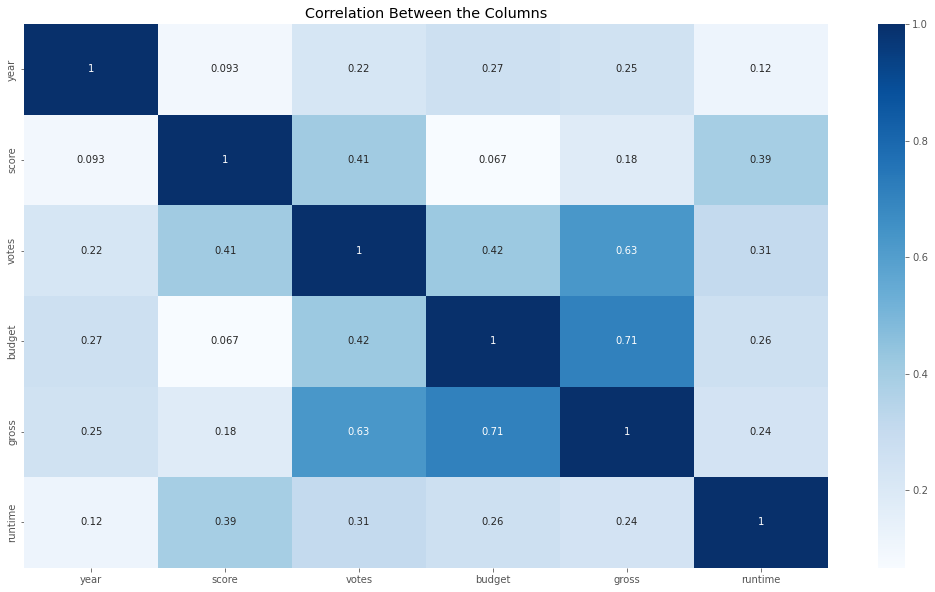

In [24]:
#Correlation

plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True, cmap = 'Blues')
plt.title('Correlation Between the Columns')

Text(0.5, 1.0, 'Correlation Of The Columns')

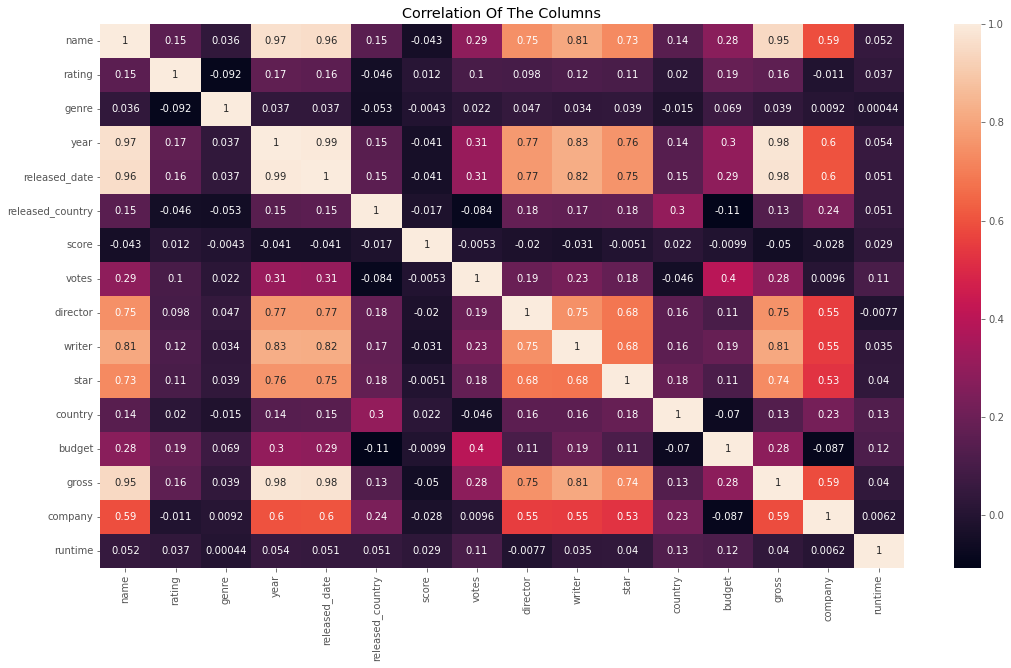

In [25]:
# Using factorize - this assigns a random numeric value for each unique categorical value
plt.figure(figsize=(18,10))
sns.heatmap(df1.apply(lambda x: x.factorize()[0]).corr(method='pearson'),annot=True)
plt.title('Correlation Of The Columns')

Dealing with Categorical Values

In [31]:
df2= df1.copy()

for col in df2.columns:
    if (df2[col].dtype == 'object'):
        df2[col] = df2[col].astype('category')
        df2[col] = df2[col].cat.codes

df2.head()

,name,rating,genre,year,released_date,released_country,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,16,57,8.4,927000.0,2589,4015,1047,55,19000000,46998772,2320,146.0
1,5573,7,1,1980,20,57,5.8,65000.0,2269,1632,327,56,4500000,58853106,731,104.0
2,5142,5,0,1980,17,57,8.7,1200000.0,1111,2567,1745,56,18000000,538375067,1540,124.0
3,286,5,4,1980,20,57,7.7,221000.0,1301,2000,2247,56,3500000,83453539,1813,88.0
4,1027,7,4,1980,24,57,7.3,108000.0,1054,521,410,56,6000000,39846344,1777,98.0


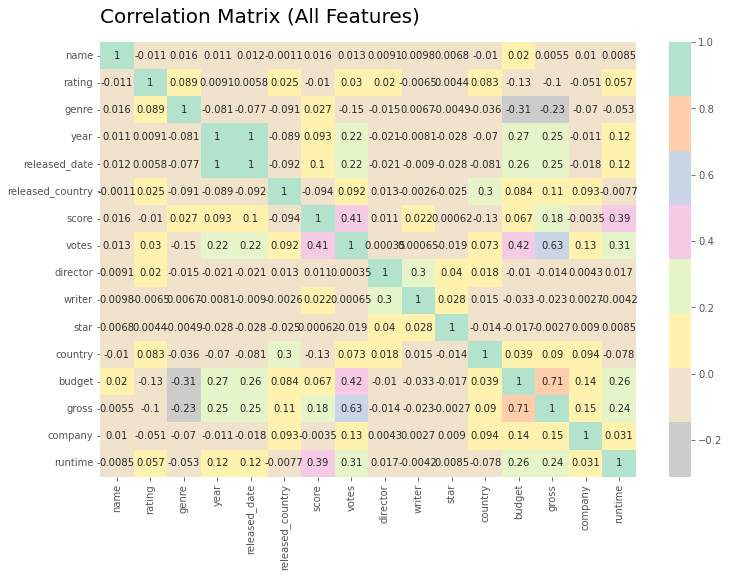

In [49]:
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Pastel2_r');
plt.title('Correlation Matrix (All Features)', loc='left', fontsize=20, pad=20);

In [50]:
corr_mat = df1.corr().unstack().sort_values(ascending=False)
corr_mat[((corr_mat) > .3) & ((corr_mat) != 1)]

gross    budget     0.711270
budget   gross      0.711270
gross    votes      0.628677
votes    gross      0.628677
budget   votes      0.421195
votes    budget     0.421195
score    votes      0.407101
votes    score      0.407101
runtime  score      0.394564
score    runtime    0.394564
runtime  votes      0.306984
votes    runtime    0.306984
dtype: float64

# Insights

Insights of the Data From the Correlation Heat Map

1. Budget has the highest correlation with gross which is 0.71.
A positive correlation between budget and gross earnings in the film industry means 
that as the budget of a film increases, so does the gross earnings of the film. 
This means that the higher the budget of a film is, the higher the gross revenue.



2. Gross and Votes has a high correlation of 0.63 which is the second highest among all other correlations.
This means that the higher the votes are for a film, the higher the gross revenue of the film.
Thus, as the number of votes are increasing, there are more people who pay to watch the film.




3. The correlation between budget and votes (correlation: 0.42: third highest correlation) 
means that higher budgets for a film tend to lead to a higher votes for a film. 
This could potentially mean higher budget films usually have more resources available for marketing, 
better production values, as well as higher quality actors and directors, 
which leads to an higher quality film that has more potentials to be better enjoyable by audiences, 
resulting in higher votes.




4. A high positive correlation between director and gross revenue (0.75 using random numeric value for categorical values) 
in the film industry means that the more successful a film director is, the higher the gross of the film will be. 
his could include the director's reputation, the quality of their work, and the level of star power they attract towards a film.
If a director is successful, it usually because of a successful film that they direct.




5. High positive correlation between star and gross means that when a star actor / actress is featured in a film, it is likely to earn higher gross revenue.
This is because of the viewers who like a certain actor/actress and are more likely to watch their films.


# SUMMARY

In conclusion from this analysis, we can clearly see that variables like company, director, star, and country where a movie is released have little to no correlation with the actual gross revenue. 
On the other hand, budget and votes seems to have a higher impact towards the gross revenue.

Moreover, the year of release seems to make a good influence towards the budget. 
From this, we can conclude that the movie industry has gotten larger every year,
hence, it is very common to see a budget increase as the revenue increases as well. 

Last but not least, movie runtime also shows some correlation with the budget. 
Longer films has a higher cost production, that does not necessarily reflect the movie industry in geneal,
but is in for a deeper analysis into what factors do and don't drive the revenues in the movie industry. 